### Data Source: https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd
from pandas import Series, DataFrame

# Data Analysis and Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# Reading Training Data Set

In [2]:
train_data = pd.read_csv("train.csv", index_col = 0)

train_data.head() # See first 5 (by default) dataframes

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Training Data Overview

In [3]:
train_data.info() # Used to check for NaN objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Findings
Total number of entries: 891. Some missing values for age, cabin, embarked.

Feature / Parameters >
- Passenger Class
- Name
- Sex
- Age
- Sibling / Spouse
- Parent / Child
- Ticket
- Fare
- Cabin
- Embarked

Target > Survived

Features to be Excluded >
- Name
- Ticket
- Fare

These features are excluded as they are intuitively not seen to have any significant impact on the Survival of the passenger.

Features / Parameters to analyse >
- Passenger Class
- Sex
- Age
- Sibling / Spouse
- Parent / Child
- Cabin
- Embarked

In [4]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Processing and Visualization
- Age > Continuous to discrete classes
- Sex / Gender > Discrete classes and check for NaN. 
- Accompanied by Relatives > Merge SibSp and Parch. If > 0, then Not Alone, else, Alone
- Cabin > Convert Cabin data to Deck level (Assuming first letter is Deck position)
- Embarked > Convert alphabet classes to numerical

If NaN, then set to Unknown

## Age

In [5]:
# Age to Age Category - Child (age < 15 y.o), Adult (15 <= age < 65 y.o), Senior (age >= 65 y.o) Categories

# Add new column to input categories (write in same dataframe)
def age_categorization(passenger_age):
    # Compare the age, otherwise leave the sex
    #print(passenger_age, type(passenger_age))
    
    if passenger_age < 16:
        return 'Child'
    elif passenger_age >= 16 and passenger_age < 65:
        return 'Adult'
    elif passenger_age >= 65:
        return 'Senior'
    else: # Unknown
        return 'Unknown'

train_data["Age Category"] = train_data['Age'].apply(age_categorization) 
train_data.head(n = 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult


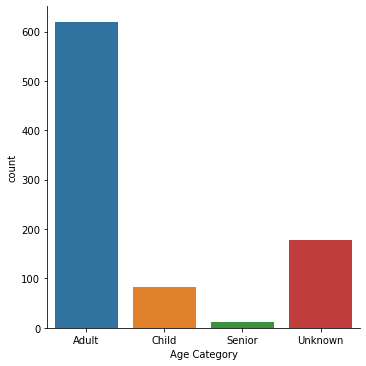

In [6]:
# Age Category
sns.catplot(x = "Age Category", data = train_data, kind = 'count', order = ['Adult', 'Child', 'Senior', 'Unknown'])

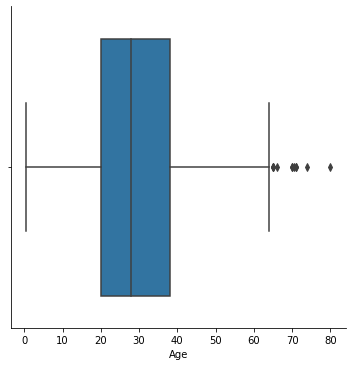

In [7]:
sns.catplot(x = 'Age', data = train_data, kind = 'box')

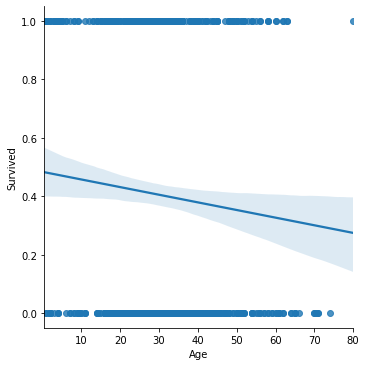

In [8]:
sns.lmplot(x = 'Age', y = 'Survived', data = train_data)

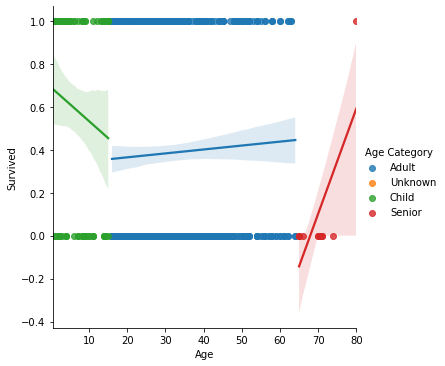

In [9]:
# Let's use a linear plot on age versus survival separated for person
sns.lmplot(x = 'Age', y = 'Survived', data = train_data, hue = 'Age Category')  # Age-Survival Correlation detected

#### Correlation detected between Age and Survival

# Gender

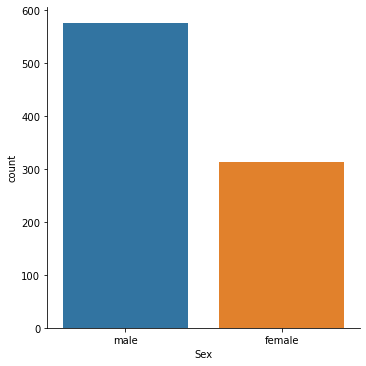

In [10]:
# Gender Comparison
sns.catplot(x = 'Sex', data = train_data, kind = 'count')

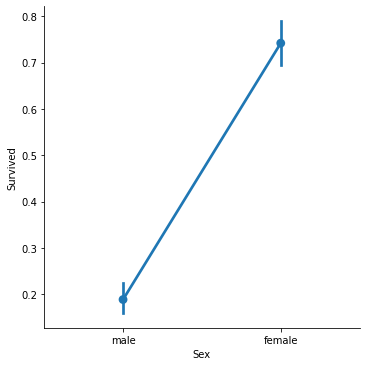

In [11]:
# Survival Rate compared to Pclass separated by person
sns.catplot(x = 'Sex', y = 'Survived', data = train_data, kind = 'point')

#### Correlation detected between Gender and Survival

# Alone or Not

In [12]:
# Sibsp, Parch to Accompanied Categories (Yes and No)

def accomponied_categorization(passenger):
    age_category, sibsp, parch = passenger
    
    family_members = sibsp + parch
    
    if family_members > 0:
        return 'False'
    elif family_members == 0:
        return 'True'
    elif family_members == 0 and age_category == "Child": # Assuming the child is accompanied by a nanny, already included
        return "False"
    else:
        return "Unknown"

train_data["Alone"] = train_data[['Age Category', 'SibSp', 'Parch']].apply(accomponied_categorization, axis = 1) 
train_data.head(n = 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,True
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,True
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,True
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,False
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,False


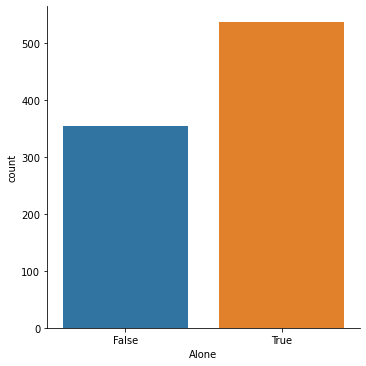

In [13]:
# Passenger with Relatives Onboard
sns.catplot(x = "Alone", data = train_data, kind = 'count')

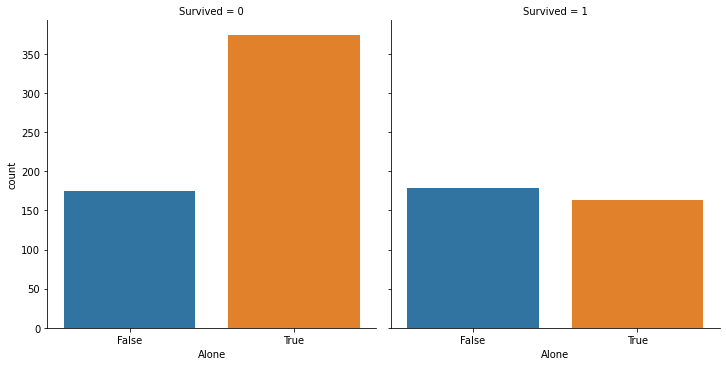

In [14]:
sns.catplot(x='Alone', col='Survived', data = train_data, kind = 'count')

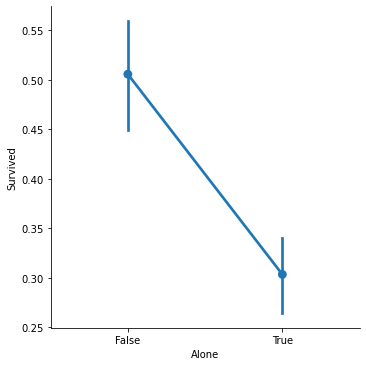

In [15]:
sns.catplot(x='Alone', y='Survived', data = train_data, kind = 'point')

#### Correlation detected between having Relatives as fellow Passengers and Survival

# Passenger Class

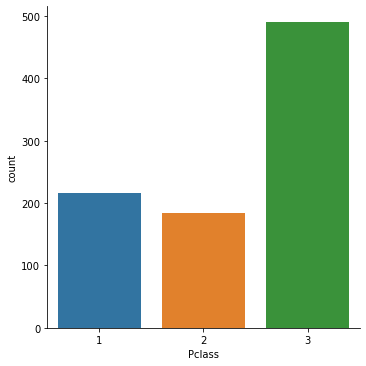

In [16]:
# Number of People at each Passenger Class
sns.catplot(x = 'Pclass', data = train_data, kind = 'count')

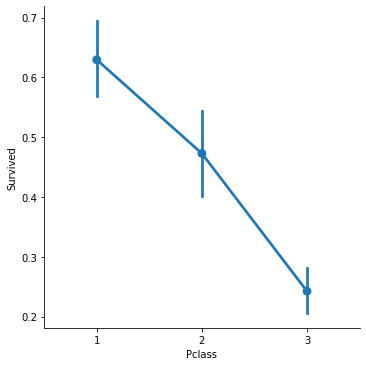

In [17]:
sns.catplot(x='Pclass', y='Survived', data = train_data, kind = 'point')

#### Correlation detected between having Passenger Class and Survival

# Cabin

In [18]:
# NaN data type is float but cabin is string. Conflicting data types cause issue in processing. Need to convert all to string.
values = {'Cabin': '0'}

train_data.fillna(value = values, inplace = True)

# Cabin data to Deck Position Conversion
def cabinToDeckConversion(cabin):
    #print(cabin, cabin[0], type(cabin))
    
    if cabin[0] == '0':
        # print("No data present")
        return 'Unknown'
    else:
        # print(cabin[0])
        return cabin[0]

train_data['Deck'] = train_data['Cabin'].apply(cabinToDeckConversion) 
train_data.head(n = 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Adult,False,Unknown
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,False,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Adult,True,Unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,False,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Adult,True,Unknown
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q,Unknown,True,Unknown
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,True,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,Child,False,Unknown
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,Adult,False,Unknown


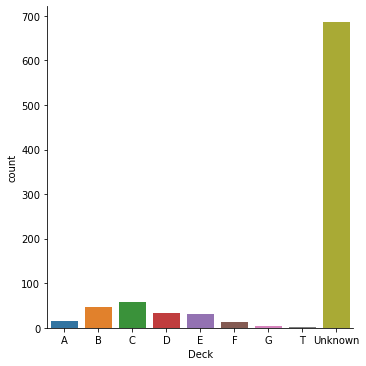

In [19]:
sns.catplot(x = 'Deck', data = train_data, kind = 'count', order = ['A', 'B', 'C', 'D', 'E', 'F',  'G', 'T', 'Unknown']) # try to rearrange to alphabetical order

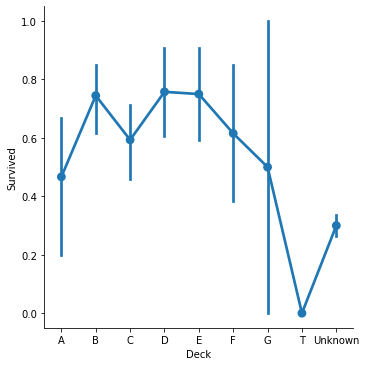

In [20]:
sns.catplot(x = 'Deck', y = 'Survived', data = train_data, kind = 'point', order = ['A', 'B', 'C', 'D', 'E', 'F',  'G', 'T', 'Unknown']) # try to rearrange to alphabetical order

#### Limited Correlation undetected between Cabin and Survival 

T Deck location unknown, swap to unknown? 

# Embarked

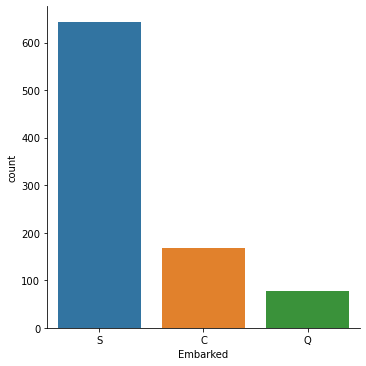

In [21]:
sns.catplot(x='Embarked', data=train_data, kind='count')

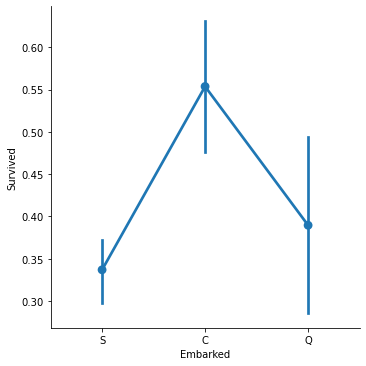

In [22]:
sns.catplot(x = 'Embarked', y = 'Survived', data = train_data, kind = 'point')

#### Limited Correlation detected between Port of Embarkation and Survival Rate
High Survival rate of those embarking from Port C

# Conversion of Categorical Class to Numerical Class

In [23]:
train_data.head(n=20)
# train_data = pd.read_csv("train.csv", index_col = 0) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Adult,False,Unknown
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,False,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Adult,True,Unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,False,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Adult,True,Unknown
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q,Unknown,True,Unknown
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,True,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,Child,False,Unknown
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,Adult,False,Unknown


In [24]:
# Drop Unnecessary Details
train_data.drop(['Name', 'Ticket', 'Fare', 'SibSp', 'Parch'], axis=1, inplace=True)
train_data.head(n=20)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,
1,0,3,male,22.0,0,S,Adult,False,Unknown
2,1,1,female,38.0,C85,C,Adult,False,C
3,1,3,female,26.0,0,S,Adult,True,Unknown
4,1,1,female,35.0,C123,S,Adult,False,C
5,0,3,male,35.0,0,S,Adult,True,Unknown
6,0,3,male,NaN,0,Q,Unknown,True,Unknown
7,0,1,male,54.0,E46,S,Adult,True,E
8,0,3,male,2.0,0,S,Child,False,Unknown
9,1,3,female,27.0,0,S,Adult,False,Unknown


## Age

In [25]:
# Age to Age Category - Child (age < 15 y.o), Adult (15 <= age < 65 y.o), Senior (age >= 65 y.o) Categories

# Add new column to input categories (write in same dataframe)
def age_categorization(passenger_age):
    # Compare the age, otherwise leave the sex
    #print(passenger_age, type(passenger_age))
    
    if passenger_age < 16:
        return 1
    elif passenger_age >= 16 and passenger_age < 65:
        return 2
    elif passenger_age >= 65:
        return 3
    else: # Unknown
        return 0

train_data["Age Category"] = train_data['Age'].apply(age_categorization) 
train_data.head(n = 10)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,
1,0,3,male,22.0,0,S,2,False,Unknown
2,1,1,female,38.0,C85,C,2,False,C
3,1,3,female,26.0,0,S,2,True,Unknown
4,1,1,female,35.0,C123,S,2,False,C
5,0,3,male,35.0,0,S,2,True,Unknown
6,0,3,male,NaN,0,Q,0,True,Unknown
7,0,1,male,54.0,E46,S,2,True,E
8,0,3,male,2.0,0,S,1,False,Unknown
9,1,3,female,27.0,0,S,2,False,Unknown


## Gender

In [26]:
def sex_categorization(passenger_sex):
    # Compare the age, otherwise leave the sex
    #print(passenger_age, type(passenger_age))
    
    if passenger_sex == "male":
        return 1
    elif passenger_sex == "female":
        return 2
    else: # Unknown
        return 0

train_data["Sex"] = train_data['Sex'].apply(sex_categorization) 
train_data.head(n = 10)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,
1,0,3,1,22.0,0,S,2,False,Unknown
2,1,1,2,38.0,C85,C,2,False,C
3,1,3,2,26.0,0,S,2,True,Unknown
4,1,1,2,35.0,C123,S,2,False,C
5,0,3,1,35.0,0,S,2,True,Unknown
6,0,3,1,NaN,0,Q,0,True,Unknown
7,0,1,1,54.0,E46,S,2,True,E
8,0,3,1,2.0,0,S,1,False,Unknown
9,1,3,2,27.0,0,S,2,False,Unknown


## Alone

In [27]:
def alone_categorization(alone_class):
    if alone_class == 'True':
        return 1
    elif alone_class == 'False':
        return 2
    else:
        return 0

train_data["Alone"] = train_data['Alone'].apply(alone_categorization) 
train_data.head(n = 20)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,
1,0,3,1,22.0,0,S,2,2,Unknown
2,1,1,2,38.0,C85,C,2,2,C
3,1,3,2,26.0,0,S,2,1,Unknown
4,1,1,2,35.0,C123,S,2,2,C
5,0,3,1,35.0,0,S,2,1,Unknown
6,0,3,1,NaN,0,Q,0,1,Unknown
7,0,1,1,54.0,E46,S,2,1,E
8,0,3,1,2.0,0,S,1,2,Unknown
9,1,3,2,27.0,0,S,2,2,Unknown


## Deck

In [28]:
def deck_numerical_categorization(deck_class):
    if deck_class == 'A':
        return 1
    elif deck_class == 'B':
        return 2
    elif deck_class == 'C':
        return 3
    elif deck_class == 'D':
        return 4
    elif deck_class == 'E':
        return 5
    elif deck_class == 'F':
        return 6
    elif deck_class == 'G':
        return 7
    else:  # Merge T with Unknown
        return 0
    
train_data["Deck"] = train_data['Deck'].apply(deck_numerical_categorization) 
train_data.head(n = 20)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,
1,0,3,1,22.0,0,S,2,2,0
2,1,1,2,38.0,C85,C,2,2,3
3,1,3,2,26.0,0,S,2,1,0
4,1,1,2,35.0,C123,S,2,2,3
5,0,3,1,35.0,0,S,2,1,0
6,0,3,1,NaN,0,Q,0,1,0
7,0,1,1,54.0,E46,S,2,1,5
8,0,3,1,2.0,0,S,1,2,0
9,1,3,2,27.0,0,S,2,2,0


## Embarked

In [29]:
def embarked_numerical_categorization(deck_class):
    if deck_class == 'S':
        return 1
    elif deck_class == 'C':
        return 2
    elif deck_class == 'Q':
        return 3
    else:  # Merge T with Unknown
        return 0
    
train_data["Embarked"] = train_data['Embarked'].apply(embarked_numerical_categorization) 
train_data.head(n = 20)

,Survived,Pclass,Sex,Age,Cabin,Embarked,Age Category,Alone,Deck
PassengerId,,,,,,,,,
1,0,3,1,22.0,0,1,2,2,0
2,1,1,2,38.0,C85,2,2,2,3
3,1,3,2,26.0,0,1,2,1,0
4,1,1,2,35.0,C123,1,2,2,3
5,0,3,1,35.0,0,1,2,1,0
6,0,3,1,NaN,0,3,0,1,0
7,0,1,1,54.0,E46,1,2,1,5
8,0,3,1,2.0,0,1,1,2,0
9,1,3,2,27.0,0,1,2,2,0


# Machine Learning Train data Fitting

In [30]:
# X_train = train_data.loc[['Age Category', 'Sex', 'Alone', 'Pclass', 'Embarked', 'Deck']]
X_train = train_data.loc[:, ['Age Category', 'Sex', 'Alone', 'Pclass', 'Embarked', 'Deck']]
X_train

,Age Category,Sex,Alone,Pclass,Embarked,Deck
PassengerId,,,,,,
1,2,1,2,3,1,0
2,2,2,2,1,2,3
3,2,2,1,3,1,0
4,2,2,2,1,1,3
5,2,1,1,3,1,0
...,...,...,...,...,...,...
887,2,1,1,2,1,0
888,2,2,1,1,1,2
889,0,2,2,3,1,0


In [31]:
y_train = train_data['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(max_iter=200)
log_regr.fit(X_train, y_train)
print(f"Coefficients > \n{log_regr.coef_}\nIntercept > {log_regr.intercept_}")

Coefficients > 
[[-0.06232809  2.48536936  0.08893663 -0.78815223  0.27831793  0.17333148]]
Intercept > [-2.71515379]
